1. Introduction
2. Data preparation
2.1 Load data
2.2 Check for null and missing values
2.3 Normalization
2.4 Reshape
2.5 Label encoding
2.6 Split training and valdiation set
3. CNN
3.1 Define the model
3.2 Set the optimizer and annealer
3.3 Data augmentation
4. Evaluate the model
4.1 Training and validation curves
4.2 Confusion matrix
5. Prediction and submition
5.1 Predict and Submit results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

random_state = np.random.seed(22)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('seaborn')

# Where to save the figures
PROJECT_ROOT_DIR = '/home/tulan/PycharmProjects/Google/Machine_Learning/EE258/HW5/'
IMAGE_FOLD = 'images/Keras_CNN'
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, IMAGE_FOLD)

def save_fig(fig_id, tight_layout=True):
    if not os.path.exists(IMAGE_DIR):
        os.makedirs(IMAGE_DIR)
    path = os.path.join(IMAGE_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [12]:
# Load the data
train = pd.read_csv(PROJECT_ROOT_DIR + 'MNIST/train.csv')
test = pd.read_csv(PROJECT_ROOT_DIR + 'MNIST/test.csv')

In [4]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [7]:
print(train[0:10])

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ... 

In [13]:
X_train = train.drop(labels='label', axis=1).astype(float)
y_train = train['label']
print(X_train[0:10], y_train[0:10])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0     0.0    ...          0.0       0.0       0.0       0.0       0.0   
1     

Saving figure digit count


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

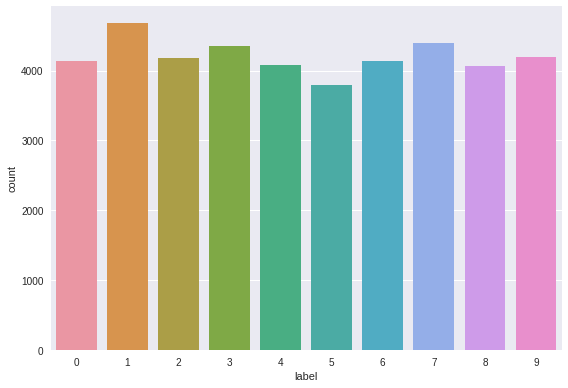

In [8]:
sns.countplot(y_train)
save_fig('digit count')
y_train.value_counts()

In [6]:
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(test)

In [10]:
df_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB


In [11]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
# Normalization (zero-center)
Mean = np.mean(X_train, axis=0)
X_train -= Mean
test -= Mean
X_train /= 256
test /= 256
print(X_train[0:5])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0     0.0    ...    -0.000857 -0.000457 -0.000231 -0.000079 -0.000067   
1     0.0    ...    -0.000857 -0.000457 -0.000231 -0.000079 -0.000067   
2     0.0    ...    -0.000857 -0.000457 -0.000231 -0.000079 -0.000067   
3     0.0    ...    -0.000857 -0.000457 -0.000231 -0.000079 -0.000067   
4     0.0    ...    -0.000857 -0.000457 -0.000231 -0.000079 -0.000067   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0 -0.000011       0.0       0.0       0.0   

In [15]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanel = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [16]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape, y_train[0:2]

((42000, 10), array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [17]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True,
                                                  test_size = 0.1, random_state=random_state)
y_train[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

Saving figure example digit


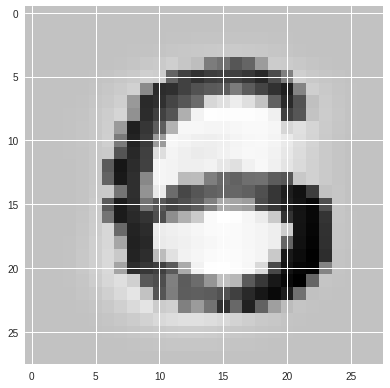

In [16]:
# example
plt.imshow(X_train[0][:,:,0])
save_fig('example digit')

In [5]:
bias_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=22)

In [6]:
## Model 1 ###
# Set the CNN model 

model = Sequential()

# conv1, 3*3*32 *3
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, 
                 activation ='relu', input_shape = (28,28,1), ))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# max-pool 1 output: 14*14*32
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
# drop-out 1
model.add(Dropout(0.25))

# conv2, 3*3*64 *3
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, activation ='relu', bias_initializer=bias_initializer))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, activation ='relu', bias_initializer=bias_initializer))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, activation ='relu', bias_initializer=bias_initializer))
# max-pool 2 output: 7*7*64
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
# drop-out 2
model.add(Dropout(0.25))


# conv3, 3*3*128 *3
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# max-pool 2 output: 3*3*128
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
# drop-out 3
model.add(Dropout(0.25))

# full-connected 1152
model.add(Flatten())
# fc-1 1152 / 4 =288
model.add(Dense(288, activation = "relu", use_bias=True, bias_initializer=bias_initializer,))
model.add(Dense(72, activation = "relu", use_bias=True, bias_initializer=bias_initializer,))
model.add(Dropout(0.25))
# fc-2 output: 10
model.add(Dense(10, activation = "softmax", use_bias=True, bias_initializer=bias_initializer,))

model.summary()


### model 2 ###
# Set the CNN model 
# 
# model = Sequential()
# 
# # conv1, 3*3*32 *3
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# # pool 1 output: 24*24*32
# model.add(Conv2D(filters = 32, kernel_size = (9,9),padding = 'valid', activation ='relu'))
# # drop-out 1
# model.add(Dropout(0.25))
# 
# # conv2, 3*3*64 *3
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, activation ='relu', bias_initializer=bias_initializer))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, activation ='relu', bias_initializer=bias_initializer))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, activation ='relu', bias_initializer=bias_initializer))
# # max-pool 2 output: 20*20*64
# model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'valid', activation ='relu'))
# # drop-out 2
# model.add(Dropout(0.25))
# 
# 
# # conv3, 3*3*128 *3
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# # max-pool 3 output: 16*16*128
# model.add(Conv2D(filters = 128, kernel_size = (7,7),padding = 'valid', activation ='relu'))
# # drop-out 3
# model.add(Dropout(0.25))
# 
# # conv4, 3*3*256 *3
# model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
#                  use_bias=True, bias_initializer=bias_initializer, activation ='relu'))
# # max-pool 4 output: 8*8*256
# model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
# # drop-out 4
# model.add(Dropout(0.25))
# 
# 
# # full-connected 8192
# model.add(Flatten())
# # fc-1 4096 / 8 =1024
# model.add(Dense(1024, activation = "relu", use_bias=True))
# # drop-out 4
# model.add(Dropout(0.25))
# # fc-2 output: 10
# model.add(Dense(10, activation = "softmax", use_bias=True))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
__________

In [20]:
# Define the optimizer
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [21]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
batch_size = 100
epochs = 5

model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=2, 
     validation_data=(X_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/5


 - 9s - loss: 0.6486 - acc: 0.7779 - val_loss: 0.1123 - val_acc: 0.9664


Epoch 2/5


 - 7s - loss: 0.1114 - acc: 0.9683 - val_loss: 0.0511 - val_acc: 0.9850


Epoch 3/5


 - 7s - loss: 0.0759 - acc: 0.9787 - val_loss: 0.0504 - val_acc: 0.9838


Epoch 4/5


 - 7s - loss: 0.0634 - acc: 0.9825 - val_loss: 0.0365 - val_acc: 0.9876


Epoch 5/5


 - 7s - loss: 0.0509 - acc: 0.9857 - val_loss: 0.0301 - val_acc: 0.9900


In [23]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [24]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=1e-5)

In [25]:
# Tensorboard
tensorboard = keras.callbacks.TensorBoard(log_dir=PROJECT_ROOT_DIR + 'logs', 
                            histogram_freq=0, batch_size=100, 
                            write_graph=True, write_grads=False, write_images=False, 
                            embeddings_freq=0, embeddings_layer_names=None, 
                            embeddings_metadata=None)

In [26]:
# Fit the model
epochs = 30

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction, tensorboard])

Epoch 1/30


 - 7s - loss: 0.1243 - acc: 0.9653 - val_loss: 0.0373 - val_acc: 0.9907


Epoch 2/30


 - 7s - loss: 0.0831 - acc: 0.9768 - val_loss: 0.0365 - val_acc: 0.9898


Epoch 3/30


 - 7s - loss: 0.0732 - acc: 0.9796 - val_loss: 0.0316 - val_acc: 0.9886


Epoch 4/30


 - 7s - loss: 0.0651 - acc: 0.9821 - val_loss: 0.0331 - val_acc: 0.9914


Epoch 5/30


 - 7s - loss: 0.0592 - acc: 0.9835 - val_loss: 0.0329 - val_acc: 0.9914


Epoch 6/30


 - 8s - loss: 0.0578 - acc: 0.9839 - val_loss: 0.0358 - val_acc: 0.9890


Epoch 7/30


 - 7s - loss: 0.0541 - acc: 0.9852 - val_loss: 0.0325 - val_acc: 0.9893


Epoch 8/30


 - 7s - loss: 0.0499 - acc: 0.9861 - val_loss: 0.0313 - val_acc: 0.9919


Epoch 9/30


 - 7s - loss: 0.0525 - acc: 0.9856 - val_loss: 0.0272 - val_acc: 0.9902


Epoch 10/30


 - 7s - loss: 0.0497 - acc: 0.9859 - val_loss: 0.0232 - val_acc: 0.9933


Epoch 11/30


 - 7s - loss: 0.0481 - acc: 0.9868 - val_loss: 0.0319 - val_acc: 0.9914


Epoch 12/30


 - 8s - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0250 - val_acc: 0.9924


Epoch 13/30


 - 8s - loss: 0.0423 - acc: 0.9879 - val_loss: 0.0220 - val_acc: 0.9940


Epoch 14/30


 - 7s - loss: 0.0419 - acc: 0.9887 - val_loss: 0.0302 - val_acc: 0.9898


Epoch 15/30


 - 7s - loss: 0.0405 - acc: 0.9882 - val_loss: 0.0301 - val_acc: 0.9929


Epoch 16/30


 - 7s - loss: 0.0446 - acc: 0.9883 - val_loss: 0.0359 - val_acc: 0.9914


Epoch 17/30


 - 7s - loss: 0.0429 - acc: 0.9881 - val_loss: 0.0229 - val_acc: 0.9945


Epoch 18/30


 - 7s - loss: 0.0370 - acc: 0.9898 - val_loss: 0.0292 - val_acc: 0.9914


Epoch 19/30


 - 7s - loss: 0.0409 - acc: 0.9882 - val_loss: 0.0296 - val_acc: 0.9919


Epoch 20/30


 - 7s - loss: 0.0393 - acc: 0.9886 - val_loss: 0.0237 - val_acc: 0.9931


Epoch 21/30



Epoch 00021: reducing learning rate to 0.00010000000474974513.
 - 7s - loss: 0.0399 - acc: 0.9891 - val_loss: 0.0296 - val_acc: 0.9914


Epoch 22/30


 - 7s - loss: 0.0268 - acc: 0.9920 - val_loss: 0.0199 - val_acc: 0.9948


Epoch 23/30


 - 7s - loss: 0.0207 - acc: 0.9938 - val_loss: 0.0189 - val_acc: 0.9950


Epoch 24/30


 - 7s - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0170 - val_acc: 0.9952


Epoch 25/30


 - 7s - loss: 0.0202 - acc: 0.9937 - val_loss: 0.0163 - val_acc: 0.9962


Epoch 26/30


 - 7s - loss: 0.0203 - acc: 0.9940 - val_loss: 0.0175 - val_acc: 0.9952


Epoch 27/30


 - 7s - loss: 0.0178 - acc: 0.9946 - val_loss: 0.0183 - val_acc: 0.9952


Epoch 28/30


 - 7s - loss: 0.0173 - acc: 0.9948 - val_loss: 0.0168 - val_acc: 0.9962


Epoch 29/30



Epoch 00029: reducing learning rate to 1.0000000474974514e-05.
 - 7s - loss: 0.0156 - acc: 0.9955 - val_loss: 0.0173 - val_acc: 0.9960


Epoch 30/30


 - 7s - loss: 0.0166 - acc: 0.9952 - val_loss: 0.0170 - val_acc: 0.9962


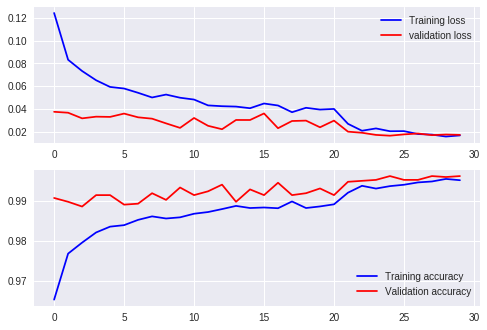

In [27]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

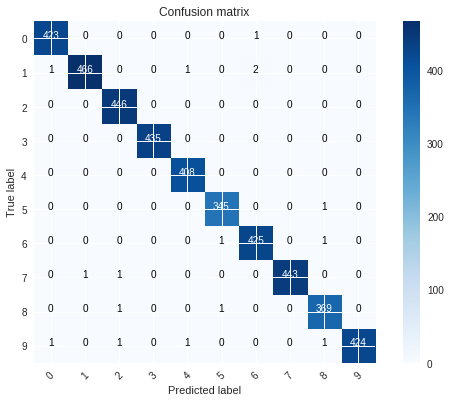

In [28]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

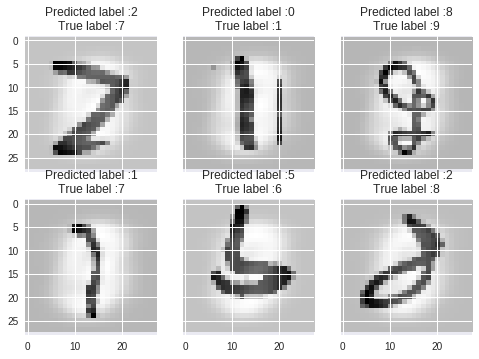

In [29]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:


# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
import datetime
timestamp = str(datetime.datetime.now())
submission.to_csv(PROJECT_ROOT_DIR + 'cnn_mnist_result_' + timestamp + '.csv',index=False)